In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Logistic Regression

## Die logistische Regression ist ein statistisches Modell für binäre Klassifikation.

### Einlesen des Trainingsdatensatzes und des Testdatensatzes.

In [257]:
def read_data():
    train_set = pd.read_csv('../data/train_set.csv')
    test_set = pd.read_csv('../data/test_set.csv')
    train_labels = pd.read_csv('../data/train_labels.csv')
    test_labels = pd.read_csv('../data/test_labels.csv')
    return train_set, test_set, train_labels, test_labels

train_set, test_set, train_labels, test_labels = read_data()

## Training des logistischen Regressionsmodells
### Wir verwenden die Standard-Parameter von sklearn's LogisticRegression

In [258]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_set, train_labels)


/opt/anaconda3/envs/diabetes_prediction/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Evaluierung des LogReg-Modells
### Berechnung der Genauigkeit auf Trainings- und Testdaten

In [259]:
predictions = pd.Series(logreg.predict(test_set))

acc_log_train = logreg.score(train_set, train_labels) * 100
print('Training accuracy:', round(acc_log_train,2,), "%")

acc_log_test = logreg.score(test_set, test_labels) * 100
print('Test accuracy:', round(acc_log_test,2,), "%")

Training accuracy: 74.5 %
Test accuracy: 76.62 %


## Detaillierte Modellanalyse
### Confusion Matrix und Klassifikationsbericht zeigen detaillierte Performancemetriken

In [260]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(test_labels, predictions))
print('\n')
print(classification_report(test_labels, predictions))

[[76 24]
 [12 42]]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81       100
           1       0.64      0.78      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154



## Precision und Recall
### Precision: Anteil der korrekten positiven Vorhersagen an allen positiven Vorhersagen
### Recall: Anteil der korrekt erkannten positiven Fälle an allen tatsächlich positiven Fällen

In [261]:
from sklearn.metrics import precision_score, recall_score

precision = round(precision_score(test_labels, predictions, pos_label=1),2)
recall = round(recall_score(test_labels, predictions, pos_label=1),2)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.64
Recall: 0.78


## Visualisierung von Precision vs. Recall

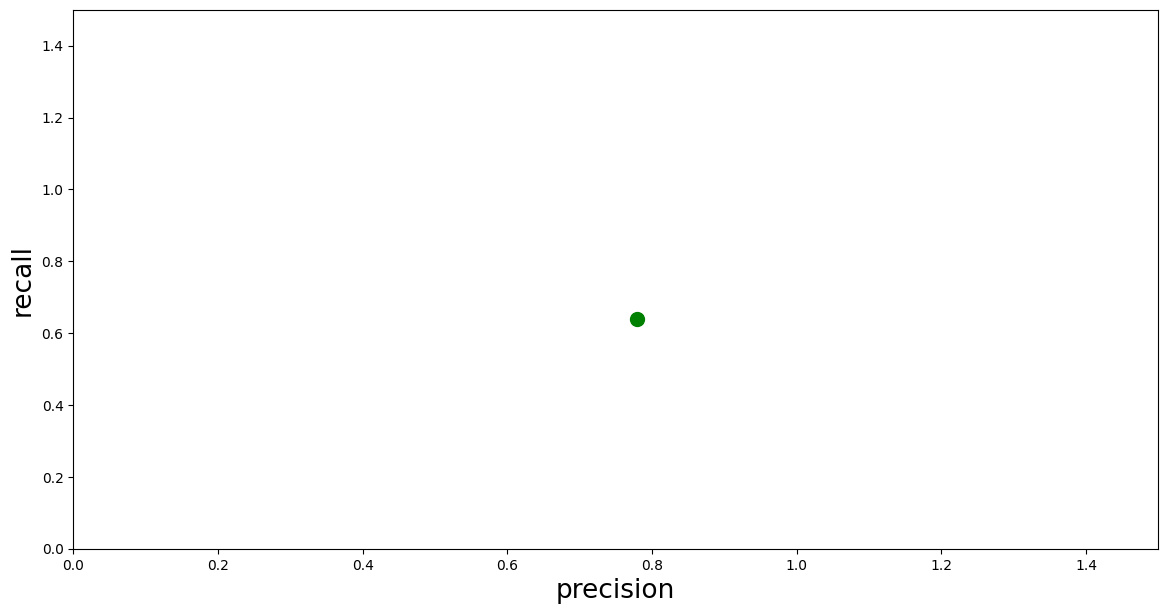

In [262]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "go", markersize = 10)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## Precision-Recall-Kurve
### Zeigt das Verhältnis von Precision und Recall bei verschiedenen Schwellenwerten

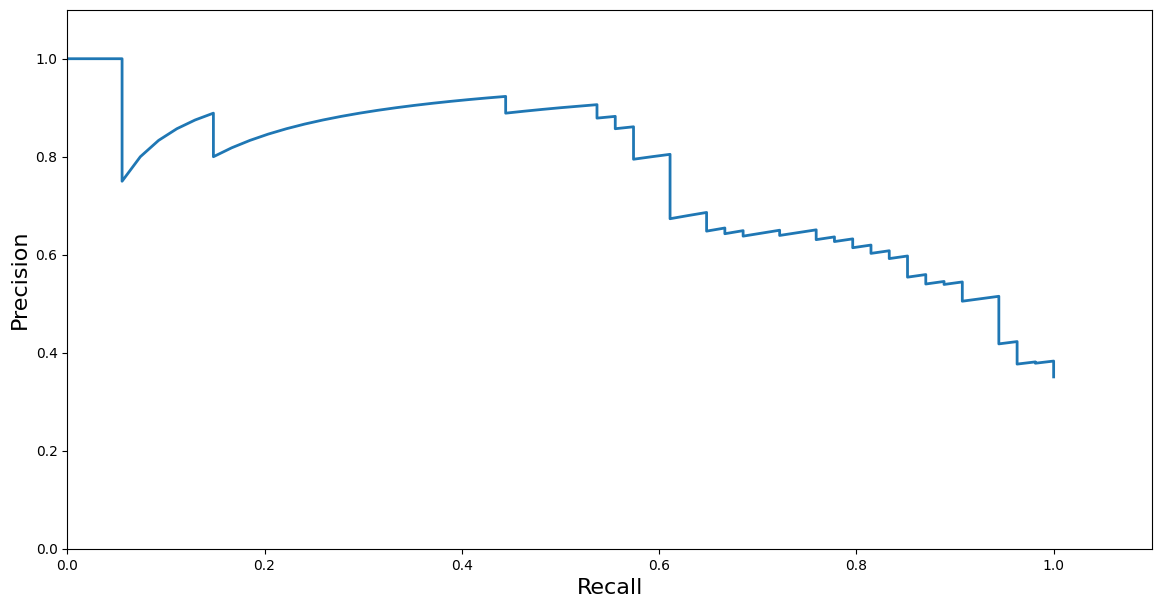

In [263]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = logreg.predict_proba(test_set)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(test_labels, y_scores, pos_label=1)

# plotting them against each other
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)

plt.figure(figsize=(14, 7))
plot_precision_recall_curve(precision, recall)
plt.show()

## F1-Score
### Der F1-Score ist das harmonische Mittel aus Precision und Recall


In [264]:
from sklearn.metrics import f1_score

print("F1-Score:", round(f1_score(test_labels, predictions, pos_label=1),2))

F1-Score: 0.7


## ROC-Kurve
### Die ROC-Kurve zeigt das Verhältnis von True Positive Rate zu False Positive Rate

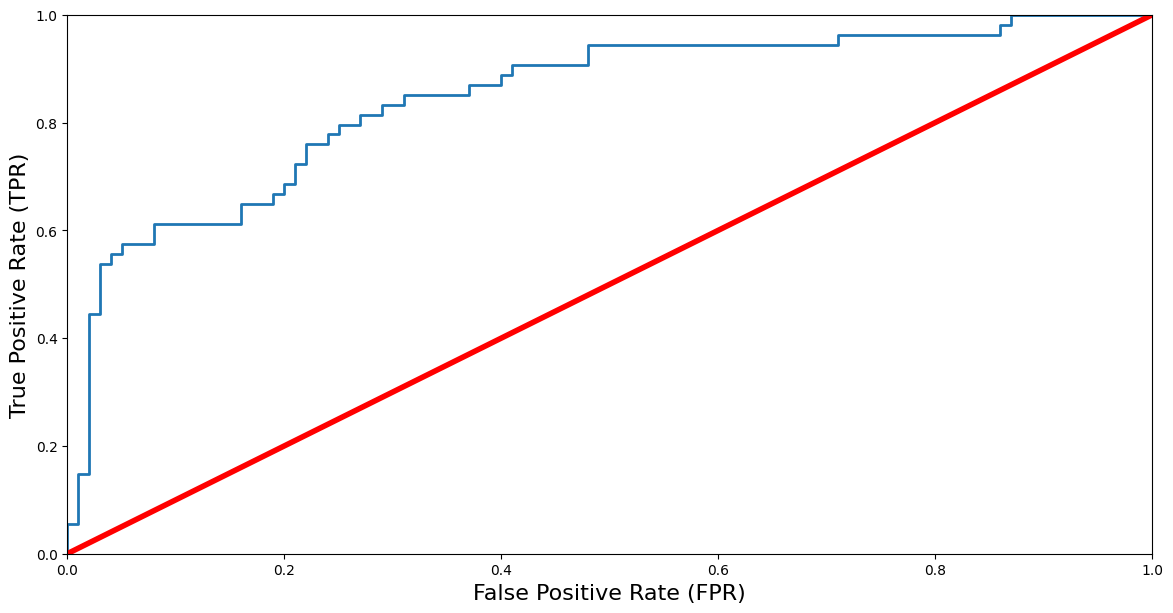

In [265]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_scores, pos_label=1)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## ROC-AUC-Score
### Area Under the ROC Curve - Ein Maß für die Gesamtperformance des Modells

In [266]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(test_labels, y_scores)
print("ROC-AUC-Score:", round(r_a_score,2))

ROC-AUC-Score: 0.85


# K-Nearest Neighbors (KNN)
## KNN ist ein nicht-parametrischer Algorithmus, der neue Datenpunkte basierend auf der Mehrheit ihrer k nächsten Nachbarn klassifiziert

In [267]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_set, train_labels)

knn_prediction = knn.predict(test_set)

/opt/anaconda3/envs/diabetes_prediction/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## KNN Evaluierung
### Vergleich der Genauigkeit auf Trainings- und Testdaten

In [268]:
acc_knn_train = round(knn.score(train_set, train_labels) * 100, 2)
print('Training accuracy:', round(acc_knn_train,2,), "%")

acc_knn_test = round(knn.score(test_set, test_labels) * 100, 2)
print('Test accuracy:', round(acc_knn_test,2,), "%")

Training accuracy: 86.75 %
Test accuracy: 68.83 %


## Modellvergleich
### Vergleich der Performance von KNN und logistischer Regression

In [269]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression'],
    'Score': [acc_knn_test, acc_log_test]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()


,Model
Score,
76.623377,Logistic Regression
68.830000,KNN


## ROC-Kurven Vergleich
### Visualisierung der ROC-Kurven beider Modelle im Vergleich

ROC-AUC LogisticRegression 0.85
ROC-AUC KNeighborsClassifier 0.76


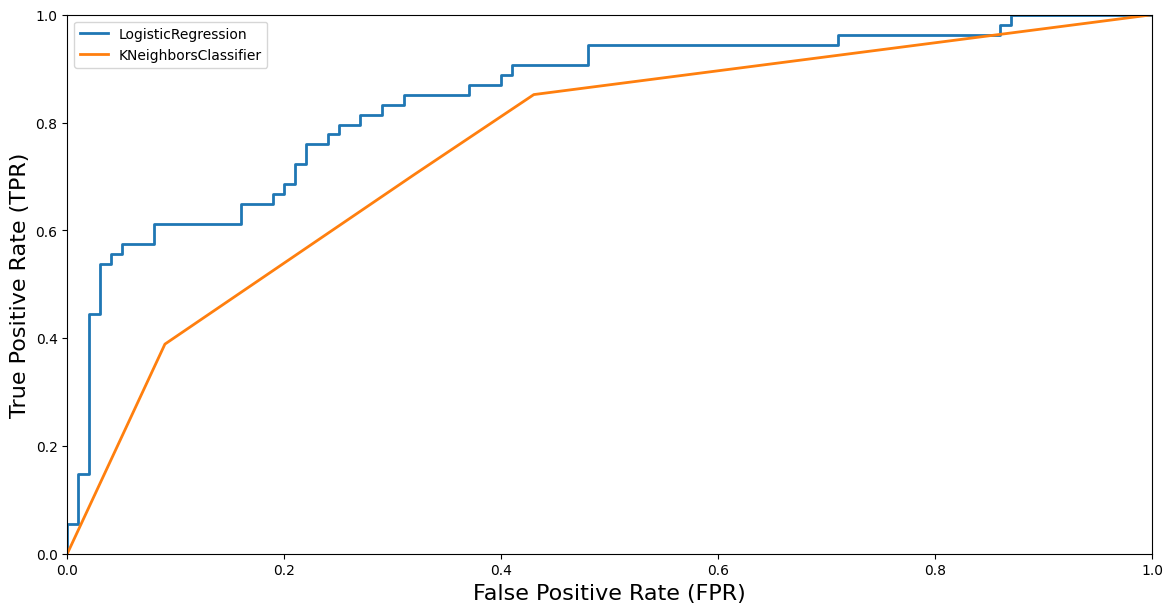

In [270]:
plt.figure(figsize=(14, 7))
for model in [logreg, knn]:
    y_scores = model.predict_proba(test_set)[:,1]
    # compute true positive rate and false positive rate
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_scores, pos_label=1)
    print('ROC-AUC', type(model).__name__, round(roc_auc_score(test_labels, y_scores),2))
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=type(model).__name__)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend()
plt.show()